### Apply text embedding model - "hkunlp/instructor-large" to find "similar phrases" to hot words (“be careful”, “destroy” and “stranger”)
- **Model card:** https://huggingface.co/hkunlp/instructor-large
- **Useful link:** https://sbert.net/docs/sentence_transformer/pretrained_models.html#instructor-models
- **Model intuition:** Text embedding model that can generate fine-tuned text embeddings with a given instruction/prompt.

In [1]:
pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("hkunlp/instructor-large")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.41k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

2_Dense%2Fconfig.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.15M [00:00<?, ?B/s]

In [3]:
# Test use-case #1: generate embeddings for sentence with instruction
sentence = "3D ActionSLAM: wearable person tracking in multi-floor environments"
instruction = "Represent the Science title:"
embeddings = model.encode([[instruction, sentence]])
print(embeddings)

[[-6.26370832e-02  2.60511995e-03  2.38032988e-03  2.72904169e-02
   5.51766418e-02  2.05091499e-02 -5.62630501e-03 -1.59504861e-02
  -3.59905288e-02  4.15526703e-02  5.64307943e-02  1.49319805e-02
   5.89986183e-02  2.71074958e-02 -3.48100252e-02 -2.64574233e-02
  -3.84423845e-02  4.90002520e-03 -2.25981362e-02  2.90626138e-02
   4.88339774e-02  2.65007298e-02 -7.69141223e-03  6.26032874e-02
   2.21087579e-02  3.11105754e-02  5.33893798e-03  5.30793816e-02
   5.35481535e-02 -4.19041626e-02  1.58362016e-02 -3.77201661e-02
  -2.36989968e-02 -4.34625223e-02 -1.47075923e-02  8.33501667e-03
   2.71654986e-02  1.25389341e-02  3.18432413e-02  5.72552271e-02
  -2.42097750e-02  9.78294387e-03  6.13643136e-03 -3.52210775e-02
   1.39099145e-02  1.40100322e-03 -3.18268314e-02 -4.58455496e-02
  -3.83994868e-03 -3.23637351e-02 -6.21243007e-02 -3.71850803e-02
  -1.23220058e-02  4.43175882e-02  1.58234499e-02 -5.69951311e-02
  -3.92473638e-02 -1.87522601e-02  4.01247479e-02 -5.19344248e-02
  -1.38024

In [4]:
# Test use-case #2: cosine similarity function
from sklearn.metrics.pairwise import cosine_similarity
sentences_a = [['Represent the Science sentence: ','Parton energy loss in QCD matter'],
               ['Represent the Financial statement: ','The Federal Reserve on Wednesday raised its benchmark interest rate.']]
sentences_b = [['Represent the Science sentence: ','The Chiral Phase Transition in Dissipative Dynamics'],
               ['Represent the Financial statement: ','The funds rose less than 0.5 per cent on Friday']]
embeddings_a = model.encode(sentences_a)
embeddings_b = model.encode(sentences_b)
similarities = cosine_similarity(embeddings_a,embeddings_b)
print(similarities)

[[0.9320791 0.8536804]
 [0.8220023 0.9149647]]


In [5]:
# Test use-case #3: Generate embeddings for series of sentences with prompt.
embeddings = model.encode(
    [
        "Dynamical Scalar Degree of Freedom in Horava-Lifshitz Gravity",
        "Comparison of Atmospheric Neutrino Flux Calculations at Low Energies",
        "Fermion Bags in the Massive Gross-Neveu Model",
        "QCD corrections to Associated t-tbar-H production at the Tevatron",
    ],
    prompt="Represent the Medicine sentence for clustering: ",
)
print(embeddings.shape)

(4, 768)


In [6]:
print(type(embeddings))

<class 'numpy.ndarray'>


In [7]:
embeddings

array([[-0.02157111, -0.01562535, -0.00868621, ..., -0.01005043,
         0.03005926,  0.07170735],
       [-0.02955201,  0.00863709, -0.0065831 , ..., -0.02315196,
         0.00636065,  0.07973389],
       [-0.02310762, -0.01129567,  0.01053178, ..., -0.03838737,
         0.00107485,  0.07011153],
       [-0.03287729,  0.02120614,  0.02321409, ..., -0.06217116,
        -0.00651736,  0.04378118]], dtype=float32)

### Perform "rule-based" clustering for similar phrases
*Task is run on google colab*
- **Instruction:** Find "similar phrases" to hot words (“be careful”, “destroy” and “stranger”)
- Apply text embedding model "hkunlp/instructor-large" on generated text to obtain similarity scores with hot-words.
- Get 75th percentile score: Rule-based clustering. User can define rules for algorithmic clustering
- Input boolean indicator to "similarity" column in dataset, save dataset.

In [8]:
# for google colab - Mount Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# import dataset
import pandas as pd
filepath = "/content/drive/MyDrive/Colab Notebooks/hotword-detection/cv-valid-dev-6300.csv"
df = pd.read_csv(filepath)
df.head()

,filename,text,up_votes,down_votes,age,gender,accent,duration,generated_text,generated_text6300
0,cv-valid-dev/sample-000000.mp3,be careful with your prognostications said the...,1,0,NaN,NaN,NaN,NaN,BE CAREFUL WITH YOUR PROGNOSTICATIONS SAID THE...,be careful with your propnostications said the...
1,cv-valid-dev/sample-000001.mp3,then why should they be surprised when they se...,2,0,NaN,NaN,NaN,NaN,THEN WHY SHOULD THEY BE SURPRISED WHEN THEY SE...,then why should they be surprised with the sie...
2,cv-valid-dev/sample-000002.mp3,a young arab also loaded down with baggage ent...,2,0,NaN,NaN,NaN,NaN,A YOUNG ARAB ALSO LOADED DOWN WITH BAGGAGE ENT...,a young arab also loaded down with baggage ant...
3,cv-valid-dev/sample-000003.mp3,i thought that everything i owned would be des...,3,0,NaN,NaN,NaN,NaN,I FELT THAT EVERYTHING I OWNED WOULD BE DESTROYED,i thought that everything i owned would be des...
4,cv-valid-dev/sample-000004.mp3,he moved about invisible but everyone could he...,1,0,fourties,female,england,NaN,HE MOVED ABOUT INVISIBLE BUT EVERY ONE COULD H...,he moved about invisible but everyone could he...


In [ ]:
# convert to lower case
df["generated_text6300"] = df["generated_text6300"].str.lower()

In [11]:
# Generate "Instruction-based" embeddings and run cosine similarity with hot words
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim

model = SentenceTransformer("hkunlp/instructor-large")
query = "which are the most similar phrases to hot words (“be careful”, “destroy” and “stranger”)"
query_instruction = (
    "Represent the question for retrieving similar documents: "
)
corpus = df["generated_text6300"].fillna("na").tolist()
corpus_instruction = "Represent the given text for retrieval: "

query_embedding = model.encode(query, prompt=query_instruction)
corpus_embeddings = model.encode(corpus, prompt=corpus_instruction)
similarities = cos_sim(query_embedding, corpus_embeddings)
print(similarities)

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tensor([[0.8609, 0.7818, 0.7891,  ..., 0.8298, 0.7534, 0.7703]])


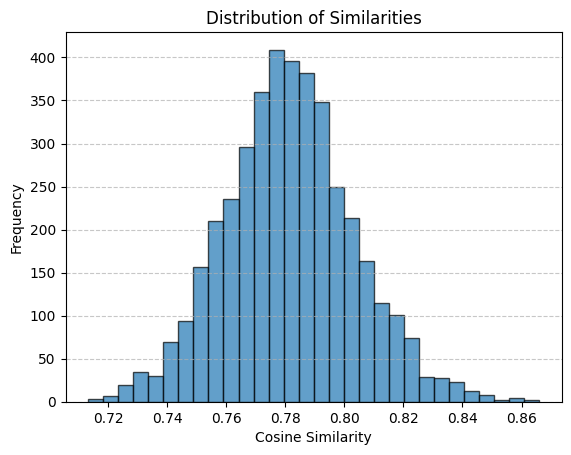

0.7948464155197144

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Convert tensor to numpy array for processing
similarities_np = similarities.numpy().flatten()

# Plot the distribution of similarities
plt.hist(similarities_np, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Distribution of Similarities")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Compute the 75th percentile
percentile_75 = np.percentile(similarities_np, 75)
percentile_75

In [13]:
# Since the curve follows an approximate normal distribution, we take similarity scores above 75th percentile as similar records
# Add similarity scores as a new column
df["similarity_score"] = similarities_np

# Compute the 75th percentile
percentile_75 = np.percentile(similarities_np, 75)

# Create a boolean indicator column
df["similarity"] = df["similarity_score"] > percentile_75

df.head()

,filename,text,up_votes,down_votes,age,gender,accent,duration,generated_text,generated_text6300,similarity_score,similarity
0,cv-valid-dev/sample-000000.mp3,be careful with your prognostications said the...,1,0,NaN,NaN,NaN,NaN,BE CAREFUL WITH YOUR PROGNOSTICATIONS SAID THE...,be careful with your propnostications said the...,0.860861,True
1,cv-valid-dev/sample-000001.mp3,then why should they be surprised when they se...,2,0,NaN,NaN,NaN,NaN,THEN WHY SHOULD THEY BE SURPRISED WHEN THEY SE...,then why should they be surprised with the sie...,0.781825,False
2,cv-valid-dev/sample-000002.mp3,a young arab also loaded down with baggage ent...,2,0,NaN,NaN,NaN,NaN,A YOUNG ARAB ALSO LOADED DOWN WITH BAGGAGE ENT...,a young arab also loaded down with baggage ant...,0.789090,False
3,cv-valid-dev/sample-000003.mp3,i thought that everything i owned would be des...,3,0,NaN,NaN,NaN,NaN,I FELT THAT EVERYTHING I OWNED WOULD BE DESTROYED,i thought that everything i owned would be des...,0.812858,True
4,cv-valid-dev/sample-000004.mp3,he moved about invisible but everyone could he...,1,0,fourties,female,england,NaN,HE MOVED ABOUT INVISIBLE BUT EVERY ONE COULD H...,he moved about invisible but everyone could he...,0.741227,False


In [ ]:
# save df
df.to_csv("/content/drive/MyDrive/Colab Notebooks/hotword-detection/cv-valid-dev-with-similarity.csv", index=False)

In [14]:
# Subset hotword samples from Q5(a) to check similarity score and similarity indicator
# Read detected sample names from detected.txt
with open("/content/drive/MyDrive/Colab Notebooks/hotword-detection/detected.txt", "r") as f:
    detected_samples = [line.strip() for line in f.readlines()]  # Remove newline characters

# Join with "cv-valid-dev/" to match df_final file names
detected_file_paths = [f"cv-valid-dev/{name}" for name in detected_samples]

# Subset records from df_final where 'file_name' matches detected_file_paths
df_subset = df[df["filename"].isin(detected_file_paths)][["filename", "generated_text6300", "similarity_score", "similarity"]]

In [15]:
df_subset

,filename,generated_text6300,similarity_score,similarity
0,cv-valid-dev/sample-000000.mp3,be careful with your propnostications said the...,0.860861,True
3,cv-valid-dev/sample-000003.mp3,i thought that everything i owned would be des...,0.812858,True
89,cv-valid-dev/sample-000089.mp3,the stranger seemed satisfied with the answer,0.820509,True
508,cv-valid-dev/sample-000508.mp3,i had to test your courage the stranger said,0.840629,True
674,cv-valid-dev/sample-000674.mp3,i had to test your corage the stranger said,0.843060,True
1093,cv-valid-dev/sample-001093.mp3,be careful with your prognostications said the...,0.856270,True
1101,cv-valid-dev/sample-001101.mp3,the stranger was speaking of things that very ...,0.810138,True
1243,cv-valid-dev/sample-001243.mp3,the stranger was speaking of things that very ...,0.810138,True
1501,cv-valid-dev/sample-001501.mp3,i had to test your courage the stranger said,0.840629,True
1933,cv-valid-dev/sample-001933.mp3,the stranger seemed satisfied with the answer,0.820509,True


In [ ]:
# Great! Similarity scores were mostly above the 75th percentile, except for one sample~